In [14]:
# torch import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

In [12]:
# general import
from __future__ import print_function

import sys
import os
import argparse
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.path.dirname("__file__"), ".."))

from mnist.models.mnist_net import mnistNet

In [56]:
# the train function
def train(model, device, train_loader, optimizer, epoch, dry_run=False):
    model.train() # put model into train mode
    for batch_idx, (data, true_label) in enumerate(train_loader):
        data, true_label = data.to(device), true_label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, true_label)
        loss.backward()
        optimizer.step()
        if batch_idx % 50 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
            if dry_run:
                break
            
# the test function
def test(model, device, test_loader):
    model.eval() # put model into eval mode
    test_loss, correct = 0, 0
    with torch.no_grad():
        for data, true_label in test_loader:
            data, true_label = data.to(device), true_label.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, true_label, reduction='sum').item()
            pred_label = output.argmax(dim=1, keepdim=True)
            correct += pred_label.eq(true_label.view_as(pred_label)).sum().item()
            
    test_loss /= len(test_dataloader.dataset)
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [52]:
# fetch MNIST data
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

train_dataloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(mnist_testset, batch_size=32, shuffle=False)

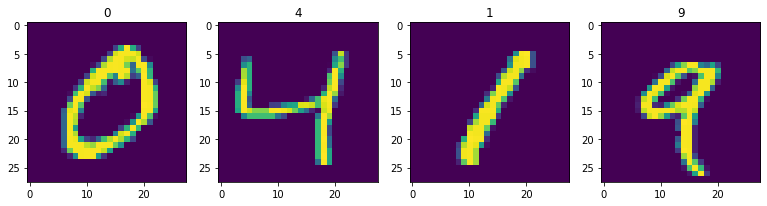

In [30]:
# visualize some images from the training set
fig = plt.figure(figsize=(20, 10))
for i in range(1,5):
    img = mnist_trainset[i][0]
    img = img.view(28, -1) # get rid of the third dimension
    label = mnist_trainset[i][1]
    fig.add_subplot(1, 6, i)
    plt.title(label)
    plt.imshow(img)
plt.show()

In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

learning_rate = 0.001
step_size = 1
num_epochs = 10
save_model = True
dry_run = True

model = mnistNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

scheduler = StepLR(optimizer, step_size=step_size)
for epoch in range(1, num_epochs + 1):
    train(model, device, train_dataloader, optimizer, epoch, dry_run)
    test(model, device, test_dataloader)
    scheduler.step()
    
if save_model:
    torch.save(model.state_dict(), "models/mnist_cnn.pt")


ok


NameError: name 'train' is not defined